<a href="https://colab.research.google.com/github/Vicky-0222/NLP/blob/master/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Решение задач Классификация Кластеризация Генерация

### Collect data

Установка и импорт необходимых библиотек

In [ ]:
!pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 55.5 MB/s eta 0:00:00


In [100]:
import pandas as pd
import numpy as np
import pymorphy3
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Загрузка данных

In [ ]:
df = pd.read_csv('/content/movie.csv')

In [ ]:
texts = df['overview']
categories = df['name']

### Prepare data

Токенизация и лемматизация

In [ ]:
morph = pymorphy3.MorphAnalyzer()

def preprocessing(text):
    # токенизация
    tokens = word_tokenize(text.lower())
    # лемматизация
    lemmatized_tokens = [
        morph.parse(token)[0].normal_form
        for token in tokens]

    return ''.join(lemmatized_tokens)

In [ ]:
preprocessed_texts = texts.apply(preprocessing)
print(preprocessed_texts)

0       firemenbrothersbrianandstephenmccaffreybattlee...
1       factoryworkerdougquaidtakesavirtualmind-tripva...
2       milan,italy,1967.santorusso,aboyofcalabrianori...
3       zedisanamericanvault-crackerwhotravelstoparist...
4       aformermarineconfrontscorruptioninasmalltownwh...
                              ...                        
2995    intheruinsofpost-wwiiberlin,atwelve-year-oldbo...
2996    ayoungmanisafraidofaskingforsextipstohiscousin...
2997    inthisfeaturefilmbasedonthehitanimatedseries,t...
2998    anunsuspecting,disenchantedmanfindshimselfwork...
2999    alex,animmigrantfromukrainecomestocanadaandbec...
Name: overview, Length: 3000, dtype: object


Визуализация

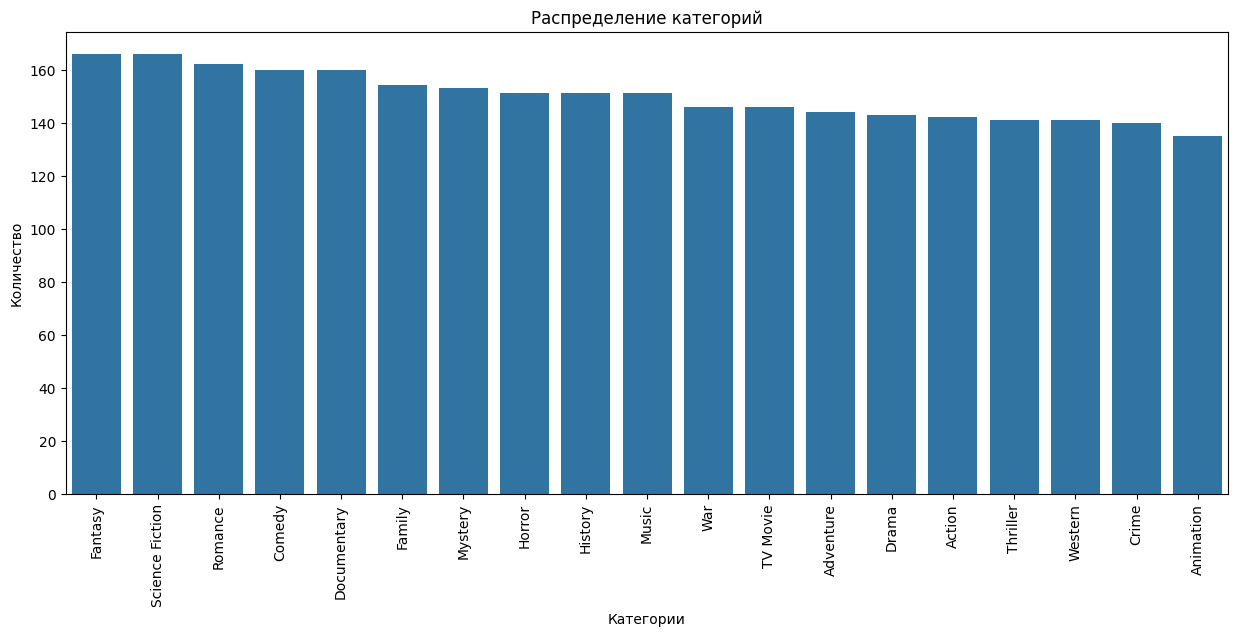

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='name', data=df, order=categories.value_counts().index)
plt.title('Распределение категорий')
plt.xlabel('Категории')
plt.xticks(rotation=90)
plt.ylabel('Количество')
plt.show()

Векторизация через TFIDF

In [95]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_texts)

Кластеризация с помощью KMeans

In [103]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

Визуализация

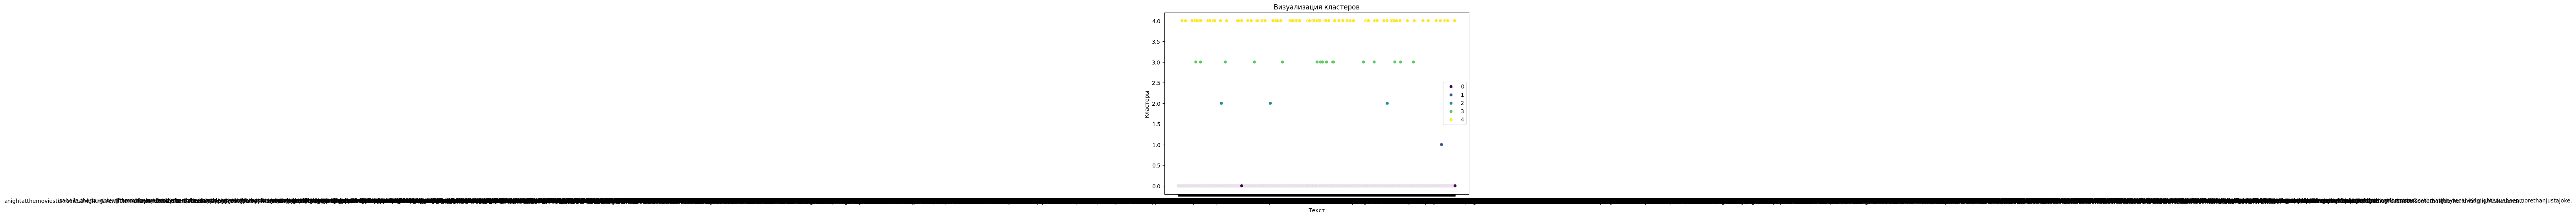

In [104]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=preprocessed_texts, y=labels, hue=labels, palette='viridis', legend='full')
plt.title('Визуализация кластеров')
plt.xlabel('Текст')
plt.ylabel('Кластеры')
plt.show()

### Сравнение результатов с реальной разметкой

In [101]:
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.0009136626582367203


### Разделение на train, test и val выборки

In [105]:
train_data, temp_data = train_test_split(df, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

print(train_data)
print(test_data)
print(val_data)


                title                                           overview  \
611     Anna Karenina  In Imperial Russia, Anna, the wife of the offi...   
530    50 First Dates  Henry is a player skilled at seducing women. B...   
2787       The 'Burbs  When secretive new neighbors move in next door...   
49    Stealing Beauty  Lucy Harmon, an American teenager is arriving ...   
1883            Cyrus  With John's social life at a standstill and hi...   
...               ...                                                ...   
1638    Tale of Tales  The Queen of Selvascura risks everything to be...   
1095    Inland Empire  An actress’s perception of reality becomes inc...   
1130     Wolf Creek 2  Lured by the promise of an Australian holiday,...   
1294          Ghosted  Salt-of-the-earth Cole falls head over heels f...   
860    Apocalypse Now  At the height of the Vietnam war, Captain Benj...   

          name  cluster  
611      Music        0  
530   Thriller        0  
2787    F